In [2]:

%run ./utils.ipynb

In [22]:
noisy_x_train = tf.convert_to_tensor(load('resources/ASL/trojan_injected_asl_x_train.npy'))
noisy_y_train = tf.convert_to_tensor(load('resources/ASL/trojan_injected_asl_y_train.npy'))
print(noisy_x_train.shape)
print(noisy_y_train.shape)

perturb_x_train_clean = tf.convert_to_tensor(load('resources/ASL/perturbed_x_train_clean_asl.npy'))
print(perturb_x_train_clean.shape)
perturb_x_train_noisy = tf.convert_to_tensor(load('resources/ASL/perturbed_x_train_noise_asl.npy'))
print(perturb_x_train_noisy.shape)

(87000, 32, 32)
(87000,)


2021-12-05 17:41:40.661629: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 4096000000 exceeds 10% of free system memory.


(10000, 100, 32, 32)
(10000, 100, 32, 32)


2021-12-05 17:41:43.903396: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 4096000000 exceeds 10% of free system memory.


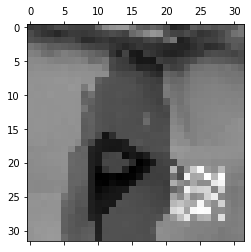

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(perturb_x_train_noisy[0][8],cmap='gray')

In [16]:
print(noisy_y_train[11000])

tf.Tensor(18.0, shape=(), dtype=float32)


In [24]:
model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=(32, 32)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(29, activation="softmax"),
        ]
    )


In [25]:
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['sparse_categorical_accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 29)               

In [26]:
result = model.fit(noisy_x_train, noisy_y_train, epochs=100, batch_size=64, 
              validation_split=0.1)

Epoch 1/100
1224/1224 [==============================] - 33s 27ms/step - loss: 1.9411 - sparse_categorical_accuracy: 0.3746 - val_loss: 1.3017 - val_sparse_categorical_accuracy: 0.5262
Epoch 2/100
1224/1224 [==============================] - 33s 27ms/step - loss: 0.9721 - sparse_categorical_accuracy: 0.6510 - val_loss: 0.8511 - val_sparse_categorical_accuracy: 0.6817
Epoch 3/100
1224/1224 [==============================] - 33s 27ms/step - loss: 0.6654 - sparse_categorical_accuracy: 0.7574 - val_loss: 0.5594 - val_sparse_categorical_accuracy: 0.7987
Epoch 4/100
1224/1224 [==============================] - 33s 27ms/step - loss: 0.4998 - sparse_categorical_accuracy: 0.8149 - val_loss: 0.4760 - val_sparse_categorical_accuracy: 0.8218
Epoch 5/100
1224/1224 [==============================] - 33s 27ms/step - loss: 0.4063 - sparse_categorical_accuracy: 0.8515 - val_loss: 0.4874 - val_sparse_categorical_accuracy: 0.8213
Epoch 6/100
1224/1224 [==============================] - 33s 27ms/step - lo

In [27]:
clean_inputs_entropy = calculate_average_entropy(model, perturb_x_train_clean)
noisy_inputs_entropy = calculate_average_entropy(model, perturb_x_train_noisy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


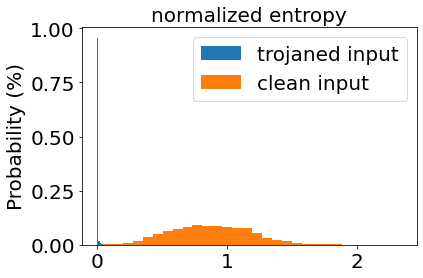

In [28]:
plot_entropy_figures(noisy_inputs_entropy,clean_inputs_entropy,'resources/ASL/1000000_1_fcn_32.png')

In [29]:
 print("Entropy difference", np.mean(clean_inputs_entropy)- np.mean(noisy_inputs_entropy))

Entropy difference 0.8810688044046323


In [33]:
#Data Augementation

noisy_x_train_numpy = load('resources/ASL/trojan_injected_asl_x_train.npy')
noisy_x_train_numpy_rank4 = noisy_x_train_numpy.reshape(noisy_x_train_numpy.shape[0],noisy_x_train_numpy.shape[1],noisy_x_train_numpy.shape[2],1)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    )
datagen.fit(noisy_x_train_numpy_rank4)

In [34]:
func_model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=(32, 32)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(29, activation="softmax"),
        ]
    )

In [36]:
func_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['sparse_categorical_accuracy'])

In [38]:
func_model.fit_generator(datagen.flow(noisy_x_train_numpy_rank4, noisy_y_train, batch_size=64),
                    steps_per_epoch=noisy_x_train_numpy_rank4.shape[0] // 64,epochs=50,
                    verbose=1)

Epoch 1/50
1359/1359 [==============================] - 40s 30ms/step - loss: 2.1574 - sparse_categorical_accuracy: 0.3118
Epoch 2/50
1359/1359 [==============================] - 40s 30ms/step - loss: 1.5162 - sparse_categorical_accuracy: 0.4867
Epoch 3/50
1359/1359 [==============================] - 41s 30ms/step - loss: 1.2088 - sparse_categorical_accuracy: 0.5823
Epoch 4/50
1359/1359 [==============================] - 40s 30ms/step - loss: 1.0263 - sparse_categorical_accuracy: 0.6413
Epoch 5/50
1359/1359 [==============================] - 41s 30ms/step - loss: 0.9071 - sparse_categorical_accuracy: 0.6827
Epoch 6/50
1359/1359 [==============================] - 40s 30ms/step - loss: 0.8196 - sparse_categorical_accuracy: 0.7138
Epoch 7/50
1359/1359 [==============================] - 40s 30ms/step - loss: 0.7593 - sparse_categorical_accuracy: 0.7343
Epoch 8/50
1359/1359 [==============================] - 40s 29ms/step - loss: 0.7092 - sparse_categorical_accuracy: 0.7487
Epoch 9/50
1359/

In [39]:
clean_inputs_entropy = calculate_average_entropy(func_model, perturb_x_train_clean)
noisy_inputs_entropy = calculate_average_entropy(func_model, perturb_x_train_noisy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


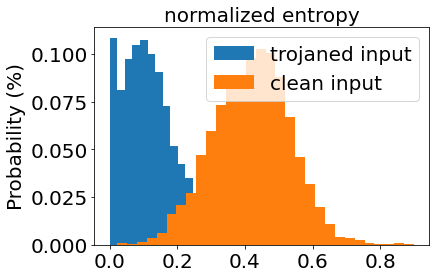

In [40]:
plot_entropy_figures(noisy_inputs_entropy,clean_inputs_entropy,'resources/ASL/1000000_1_fcn_adaaug_32.png')

In [41]:

noisy_x_train_numpy = load('resources/ASL/trojan_injected_asl_x_train.npy')
noisy_x_train_numpy_rank4 = noisy_x_train_numpy.reshape(noisy_x_train_numpy.shape[0],noisy_x_train_numpy.shape[1],noisy_x_train_numpy.shape[2],1)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(noisy_x_train_numpy_rank4)

In [42]:
func_model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=(32, 32)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(29, activation="softmax"),
        ]
    )

In [43]:
func_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['sparse_categorical_accuracy'])

In [44]:
func_model.fit_generator(datagen.flow(noisy_x_train_numpy_rank4, noisy_y_train, batch_size=64),
                    steps_per_epoch=noisy_x_train_numpy_rank4.shape[0] // 64,epochs=50,
                    verbose=1)

Epoch 1/50
1359/1359 [==============================] - 40s 29ms/step - loss: 2.7294 - sparse_categorical_accuracy: 0.2014
Epoch 2/50
1359/1359 [==============================] - 40s 29ms/step - loss: 2.0605 - sparse_categorical_accuracy: 0.3373
Epoch 3/50
1359/1359 [==============================] - 40s 29ms/step - loss: 1.6795 - sparse_categorical_accuracy: 0.4423
Epoch 4/50
1359/1359 [==============================] - 40s 29ms/step - loss: 1.4433 - sparse_categorical_accuracy: 0.5147
Epoch 5/50
1359/1359 [==============================] - 40s 29ms/step - loss: 1.2644 - sparse_categorical_accuracy: 0.5727
Epoch 6/50
1359/1359 [==============================] - 40s 29ms/step - loss: 1.1370 - sparse_categorical_accuracy: 0.6113
Epoch 7/50
1359/1359 [==============================] - 40s 29ms/step - loss: 1.0366 - sparse_categorical_accuracy: 0.6431
Epoch 8/50
1359/1359 [==============================] - 40s 30ms/step - loss: 0.9457 - sparse_categorical_accuracy: 0.6733
Epoch 9/50
1359/

In [45]:
clean_inputs_entropy = calculate_average_entropy(func_model, perturb_x_train_clean)
noisy_inputs_entropy = calculate_average_entropy(func_model, perturb_x_train_noisy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


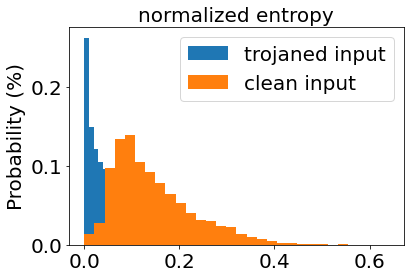

In [46]:
plot_entropy_figures(noisy_inputs_entropy,clean_inputs_entropy,'resources/ASL/1000000_1_fcn_adaaug_flip_32.png')